# Cropping the faces with OpenCv and forming the new dataset of male and female images

<b>Data Source: <b>https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

<b>Import required libraries<b>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

<b>List all the unstructured image data<b>

In [2]:
from glob import glob

In [7]:
male_path = glob('./Data/Male-Pictures/*.jpg')
female_path = glob('./Data/Female-Pictures/*.jpg')

In [8]:
len(male_path), len(female_path)

(7000, 7000)

<b>Load sample images using openCv<b>

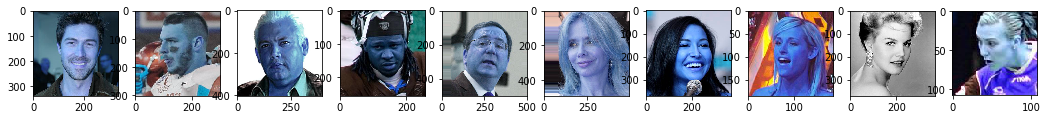

In [17]:
plt.figure(figsize=(18,18))

plt.subplot(1,10,1)
plt.imshow(cv2.imread(male_path[0]))
plt.subplot(1,10,2)
plt.imshow(cv2.imread(male_path[10]))
plt.subplot(1,10,3)
plt.imshow(cv2.imread(male_path[195]))
plt.subplot(1,10,4)
plt.imshow(cv2.imread(male_path[4190]))
plt.subplot(1,10,5)
plt.imshow(cv2.imread(male_path[1950]))
plt.subplot(1,10,6)
plt.imshow(cv2.imread(female_path[0]))
plt.subplot(1,10,7)
plt.imshow(cv2.imread(female_path[192]))
plt.subplot(1,10,8)
plt.imshow(cv2.imread(female_path[10]))
plt.subplot(1,10,9)
plt.imshow(cv2.imread(female_path[1005]))
plt.subplot(1,10,10)
plt.imshow(cv2.imread(female_path[894]))

<b>Converting color images to grayscale<b>

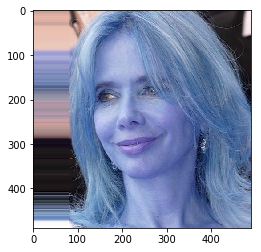

In [18]:
img = cv2.imread(female_path[0])
plt.imshow(img)

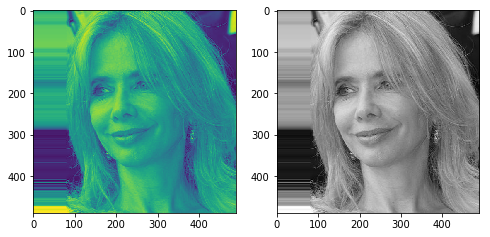

In [22]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(gray_img)
plt.subplot(1,2,2)
plt.imshow(gray_img,cmap='gray')

<b>Crop faces using Haar Cascade Classifier<b>

In [24]:
haar = cv2.CascadeClassifier('Data/haarcascade_frontalface.xml')

In [26]:
faces = haar.detectMultiScale(gray_img, scaleFactor=1.5,minNeighbors=5)
print(faces)

[[ 85  84 273 273]]


<b>Detect face with a bounding box rectangle<b>

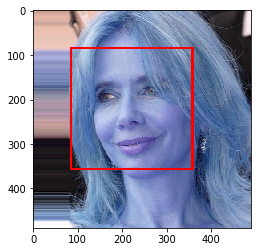

In [29]:
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(img)

<b>Crop the face<b>

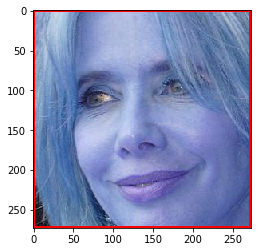

In [37]:
crop_img = img[y:y+h,x:x+w]
plt.imshow(crop_img)

<b>Save image<b>

In [32]:
cv2.imwrite('f_01.png',crop_img)

True

<b>Apply face cropping to entire dataset<b>

In [53]:
def extract_faces(path,gender,no):
    
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = haar.detectMultiScale(gray,1.5,5)
    
    for x,y,w,h in face:
        crop = img[y:y+h,x:x+w]
        if gender == 'male':
            cv2.imwrite('./Data/Crop/Male-Crop/{}_{}.png'.format(gender,no),crop)
        else:
            cv2.imwrite('./Data/Crop/Female-Crop/{}_{}.png'.format(gender,no),crop)
        
        

In [54]:
#extract_faces(male_path[0],'male',1)

<b>Storing cropped face data<b>

In [55]:
for i,path in enumerate(male_path):
    extract_faces(path,'male',i)
        
        
for i,path in enumerate(female_path):
    extract_faces(path,'female',i)
 